### <span style= "color :red"> 인공신경망 </span>
- 입력한 데이터의 특성만큼 가중치 w1~wn과 절변 b를 랜덤하게 초기화한 다음 에포크를 반복하며 SGD를 이용해 손실이 최소화 되는 절변과 가중치를 찾는 방법

In [33]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)        # (60000, 28, 28) : 60000개의 데이터, 가로 세로 각각 28픽셀 
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 패션 데이터 시각화

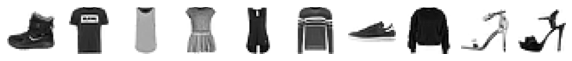

[9 0 0 3 0 2 7 2 5 5]


In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap="gray_r")
    axs[i].axis("off")

plt.show()

print(train_target[:10])

- 데이터 갯수 확인

In [16]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### <span style= "color :red"> - 경사하강법을 이용한 분류 모델 </span>

- 데이터 전처리

In [34]:
train_scaled = train_input/255.0
test_scaeld = test_input/255.0

print(train_scaled.shape, test_scaeld.shape)

(60000, 28, 28) (10000, 28, 28)


- 사이킷런의 훈련데이터로 사용하기 위한 2차원 데이터로 변형

In [19]:
train_scaled = train_scaled.reshape(-1,28*28)
test_scaeld = test_scaeld.reshape(-1,28*28)
print(train_scaled.shape, test_scaeld.shape)

(60000, 784) (10000, 784)


In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np

sc = SGDClassifier(loss="log_loss", max_iter=5, random_state=42)
cv = cross_validate(sc, train_scaled, train_target)
print(np.mean(cv['test_score']))

C:\Users\172559\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\172559\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\172559\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\172559\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

0.8192833333333333


C:\Users\172559\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### <span style= "color :red"> - 인공신경망을 이용한 분류 모델 </span>

In [24]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
print(train_scaled[0].shape)

(30720, 784) (30720,)
(7680, 784) (7680,)
(784,)


In [28]:
from typing import Sequence
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation = "softmax", input_shape =(784,)))
model.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy")     # Compile : 손실함수와 평가지표를 지정 

model.fit(train_scaled, train_target, epochs=5)         # 모델 훈련, 에포크 횟수 지정 
model.evaluate(test_scaeld, test_target)                # 모델 평가

Epoch 1/5
960/960 [==============================] - 1s 545us/step - loss: 0.6614 - accuracy: 0.7741
Epoch 2/5
960/960 [==============================] - 1s 539us/step - loss: 0.5018 - accuracy: 0.8311
Epoch 3/5
960/960 [==============================] - 1s 524us/step - loss: 0.4727 - accuracy: 0.8406
Epoch 4/5
960/960 [==============================] - 1s 531us/step - loss: 0.4551 - accuracy: 0.8469
Epoch 5/5
313/313 [==============================] - 0s 510us/step - loss: 0.4876 - accuracy: 0.8400


[0.4876455068588257, 0.8399999737739563]

### <span style= "color :red"> - 심층신경망 </span>
- 2개 이상의 층으로 구성된 인공신경망

In [31]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = "sigmoid", input_shape=(784,)))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.fit(train_scaled, train_target, epochs=5)


Epoch 1/5
960/960 [==============================] - 1s 750us/step - loss: 0.6294 - accuracy: 0.7901
Epoch 2/5
960/960 [==============================] - 1s 748us/step - loss: 0.4404 - accuracy: 0.8421
Epoch 3/5
960/960 [==============================] - 1s 761us/step - loss: 0.4020 - accuracy: 0.8565
Epoch 4/5
960/960 [==============================] - 1s 750us/step - loss: 0.3785 - accuracy: 0.8630
Epoch 5/5
960/960 [==============================] - 1s 742us/step - loss: 0.3586 - accuracy: 0.8701


- Flatten층

In [36]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
print(train_scaled[0].shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(28, 28)


In [38]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = "sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 760us/step - loss: 0.5654 - accuracy: 0.8062
Epoch 2/5
1500/1500 [==============================] - 1s 763us/step - loss: 0.4082 - accuracy: 0.8513
Epoch 3/5
1500/1500 [==============================] - 1s 753us/step - loss: 0.3741 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 1s 758us/step - loss: 0.3510 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 1s 757us/step - loss: 0.3329 - accuracy: 0.8791


- sgd 옵티마이저

In [39]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = "sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics="accuracy")

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 679us/step - loss: 1.3911 - accuracy: 0.6646
Epoch 2/5
1500/1500 [==============================] - 1s 677us/step - loss: 0.8315 - accuracy: 0.7476
Epoch 3/5
1500/1500 [==============================] - 1s 677us/step - loss: 0.6995 - accuracy: 0.7697
Epoch 4/5
1500/1500 [==============================] - 1s 676us/step - loss: 0.6351 - accuracy: 0.7847
Epoch 5/5
1500/1500 [==============================] - 1s 675us/step - loss: 0.5939 - accuracy: 0.7980


- adam 옵티마이저

In [40]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = "sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 697us/step - loss: 0.5831 - accuracy: 0.8039
Epoch 2/5
1500/1500 [==============================] - 1s 700us/step - loss: 0.4100 - accuracy: 0.8526
Epoch 3/5
1500/1500 [==============================] - 1s 694us/step - loss: 0.3725 - accuracy: 0.8658
Epoch 4/5
1500/1500 [==============================] - 1s 692us/step - loss: 0.3476 - accuracy: 0.8742
Epoch 5/5
1500/1500 [==============================] - 1s 705us/step - loss: 0.3294 - accuracy: 0.8805


### <span style= "color :red"> - 신경망 모델 훈련 </span>

In [41]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)

(48000, 28, 28) (48000,)


In [42]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)        # verbose : 진행상황 표시 지정      

In [44]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


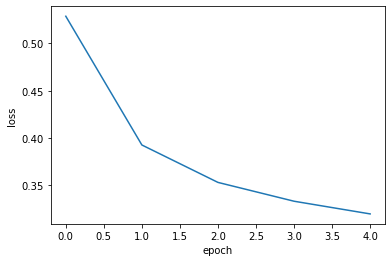

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

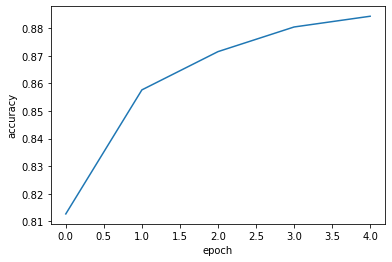

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

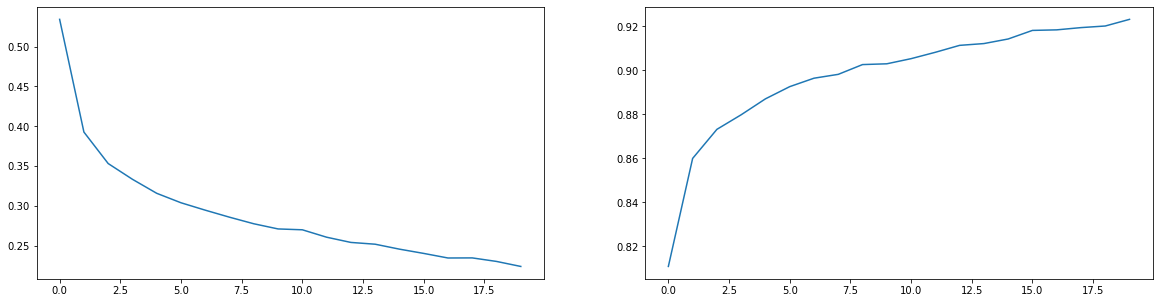

In [50]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)   

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(20,5))     
axs[0].plot(history.history['loss'])

axs[1].plot(history.history['accuracy'])

plt.show()

- 검증 손실

In [52]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))   

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


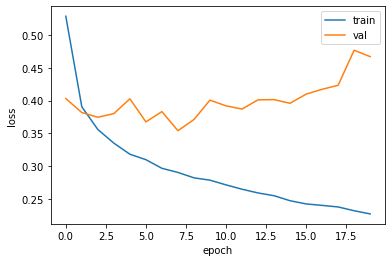

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Adam 파라미터를 이용

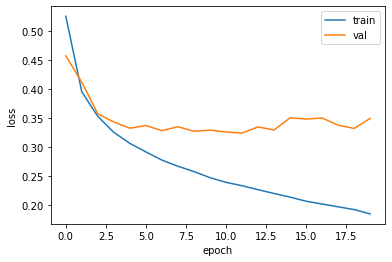

In [55]:
model = model_fn()
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))   

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### <span style= "color :red"> - 드랍아웃 모델 훈련 </span>

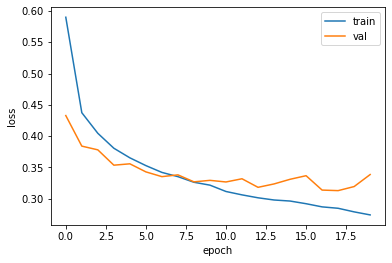

In [56]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))   

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### <span style= "color :red"> - 모델 저장과 복원 </span>

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))  

model.save_weights("model-weight.h5")       # 모델 가중치 저장
model.save("model-whole.h5")                # 모델 저장

- 저장된 모델의 가중치를 가져오기

In [63]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights("./model-weight.h5")

import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 532us/step
0.8841666666666667


- 저장된 모델을 불러와 사용하기

In [64]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 616us/step - loss: 0.3270 - accuracy: 0.8842


[0.32701221108436584, 0.8841666579246521]

### <span style= "color :red"> - 모델 콜백과 조기종료 </span>

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)    # 최적 가중치 저장 여부 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # patience : 감소 허용횟수 , restore_best_weights : 최적 가중치 회귀여부

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

- 조기 종료된 에포크 횟수

In [67]:
print(early_stopping_cb.stopped_epoch)

14


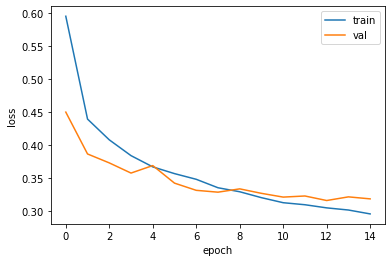

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 모델평가

In [69]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 614us/step - loss: 0.3161 - accuracy: 0.8865


[0.31613096594810486, 0.8865000009536743]